In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [7]:
%matplotlib inline

In [2]:
# In[2]: Load the Processed Dataset
df = pd.read_csv("outputs/processed_dataset.csv")

# Quick look at the data
df.head(10)


,company_name,revenue,cogs,gross_profit,opex,operating_income,net_income,period_start,period_end,filename
0,Richard Pieris Exports PLC,1344850.0,921087.0,423763.0,168892.0,260524.0,294845.0,2021-01-01,2021-03-31,rich_31-03-2021.pdf
1,DIPPED PRODUCTS PLC,13793391.0,10109673.0,3683718.0,1605861.0,2241793.0,1953741.0,2021-01-01,2021-03-31,dipd_31-03-2021.pdf
2,DIPPED PRODUCTS PLC,16781921.0,13441706.0,3340215.0,4850611.0,-365419.0,5833327.0,2021-04-01,2021-06-30,dipd_30-06-2021.pdf
3,Richard Pieris Exports PLC,1400300.0,955738.0,444562.0,239819.0,210215.0,199429.0,2021-04-01,2021-06-30,rich_30-06-2021.pdf
4,DIPPED PRODUCTS PLC,20279212.0,15530755.0,4748457.0,2097269.0,2726066.0,2110337.0,2021-07-01,2021-09-30,dipd_30-09-2021.pdf
5,Richard Pieris Exports PLC,1754079.0,1155680.0,598399.0,324984.0,279132.0,243320.0,2021-07-01,2021-09-30,rich_30-09-2021.pdf
6,DIPPED PRODUCTS PLC,12730290.0,10421358.0,2308932.0,4850611.0,-2430730.0,5833327.0,2021-10-01,2021-12-31,dipd_31-12-2021.pdf
7,Richard Pieris Exports PLC,1778416.0,1202429.0,575987.0,376883.0,205982.0,181894.0,2021-10-01,2021-12-31,rich_31-12-2021.pdf
8,Richard Pieris Exports PLC,1604137.0,1037979.0,566158.0,419096.0,153313.0,1033224.0,2022-01-01,2022-03-31,rich_31-03-2022.pdf
9,DIPPED PRODUCTS PLC,12550438.0,10174187.0,2376251.0,1811340.0,1025563.0,3011102.0,2022-01-01,2022-03-31,dipd_31-03-2022.pdf


In [3]:
print("Data Info:")
df.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      32 non-null     object 
 1   revenue           32 non-null     float64
 2   cogs              32 non-null     float64
 3   gross_profit      32 non-null     float64
 4   opex              32 non-null     float64
 5   operating_income  32 non-null     float64
 6   net_income        32 non-null     float64
 7   period_start      32 non-null     object 
 8   period_end        32 non-null     object 
 9   filename          32 non-null     object 
dtypes: float64(6), object(4)
memory usage: 2.6+ KB


In [4]:
display(df.describe())

,revenue,cogs,gross_profit,opex,operating_income,net_income
count,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01,3.200000e+01
mean,1.752682e+07,1.350367e+07,4.023145e+06,3.451137e+06,8.126349e+05,1.950031e+06
std,2.384720e+07,1.828482e+07,5.637346e+06,3.959499e+06,3.529767e+06,2.401267e+06
min,1.344850e+06,9.210870e+05,1.984910e+05,1.688920e+05,-5.863495e+06,-2.474090e+05
25%,1.772332e+06,1.398536e+06,4.232960e+05,3.611875e+05,-3.112800e+04,1.495922e+05
50%,6.750290e+06,6.044775e+06,8.570300e+05,1.093342e+06,1.441965e+05,1.012448e+06
75%,1.940972e+07,1.406625e+07,4.934474e+06,6.206450e+06,1.329620e+06,2.837279e+06
max,8.009931e+07,6.049024e+07,1.960907e+07,1.074769e+07,9.628129e+06,8.502424e+06


In [6]:
# In[4]: Ensure 'period_end' is datetime and sort
df['period_end'] = pd.to_datetime(df['period_end'])
df.sort_values('period_end', inplace=True)

# Split into separate DataFrames for each company
company_names = df['company_name'].unique()
print("Companies found:", company_names)

# For convenience:
df_dipd = df[df['company_name'] == 'DIPPED PRODUCTS PLC'].copy()
df_rexp = df[df['company_name'] == 'Richard Pieris Exports PLC'].copy()

Companies found: ['Richard Pieris Exports PLC' 'DIPPED PRODUCTS PLC']


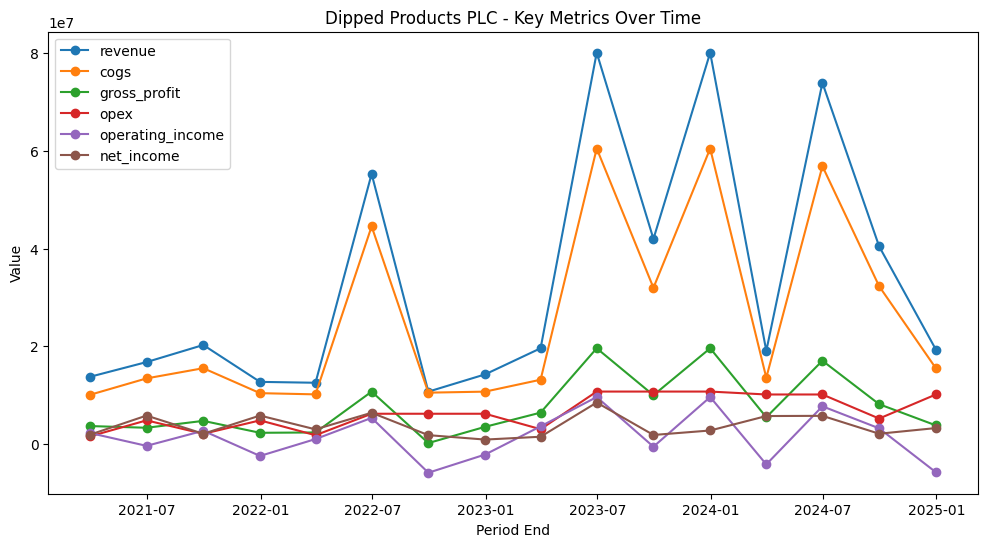

In [8]:
# In[5]: Time Series Plots - Dipped Products
metrics = ["revenue", "cogs", "gross_profit", "opex", "operating_income", "net_income"]

plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(df_dipd['period_end'], df_dipd[metric], marker='o', label=metric)

plt.title("Dipped Products PLC - Key Metrics Over Time")
plt.xlabel("Period End")
plt.ylabel("Value")
plt.legend()
plt.show()


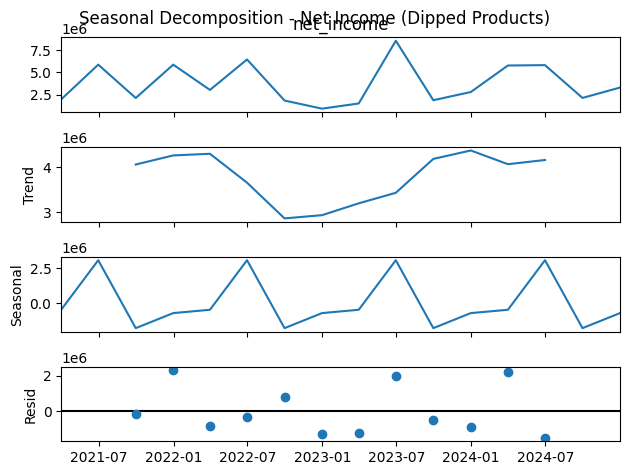

In [ ]:
# In[6]: Seasonal Decomposition (Example: Net Income)
# With quarterly data, period=4 typically
df_dipd.set_index("period_end", inplace=True)  # set index for decomposition
df_dipd.sort_index(inplace=True)

# Only do decomposition if you have enough data points
if len(df_dipd) >= 8:  # minimal check
    result = seasonal_decompose(df_dipd["net_income"], model='additive', period=4)
    result.plot()
    plt.suptitle("Seasonal Decomposition - Net Income (Dipped Products)")
    plt.show()
else:
    print("Not enough data points to reliably perform seasonal decomposition.")

# Reset index if you want to keep 'period_end' as a column
df_dipd.reset_index(inplace=True)

# In[7]: Stationarity Check (ADF Test on Net Income)
df_dipd.set_index("period_end", inplace=True)
adf_result = adfuller(df_dipd["net_income"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Similarly, you could test other metrics
df_dipd.reset_index(inplace=True)



In [14]:
# In[7]: Stationarity Check (ADF Test on Net Income)
df_dipd.set_index("period_end", inplace=True)
adf_result = adfuller(df_dipd["net_income"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Similarly, you could test other metrics
df_dipd.reset_index(inplace=True)


ADF Statistic: -141.89990745636229
p-value: 0.0


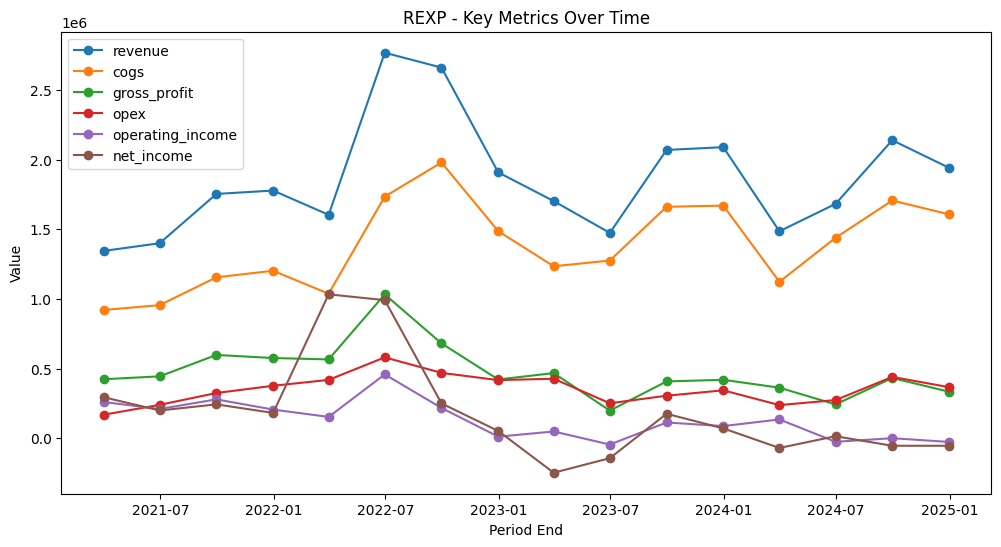

In [12]:
# In[5]: Time Series Plots - REXP
metrics = ["revenue", "cogs", "gross_profit", "opex", "operating_income", "net_income"]

plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(df_rexp['period_end'], df_rexp[metric], marker='o', label=metric)

plt.title("REXP - Key Metrics Over Time")
plt.xlabel("Period End")
plt.ylabel("Value")
plt.legend()
plt.show()


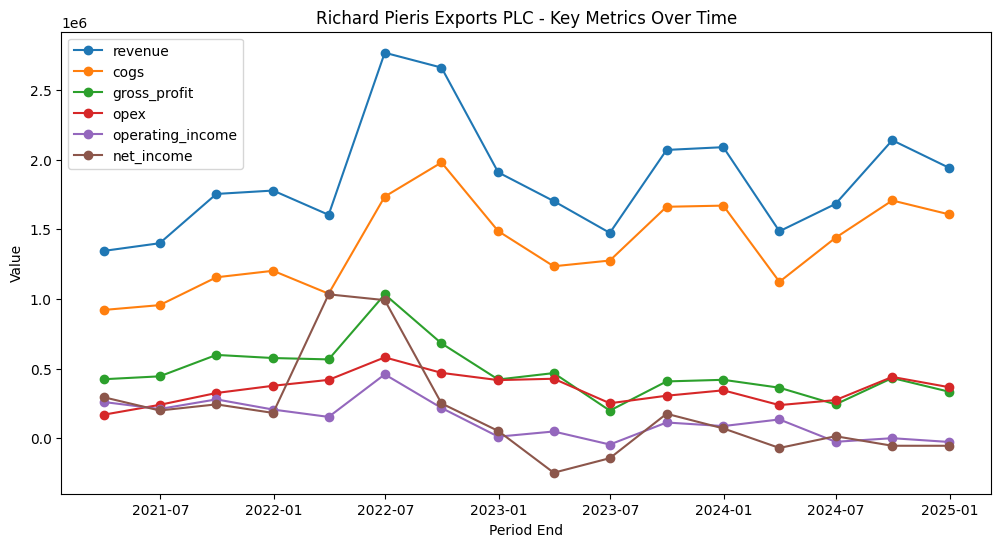

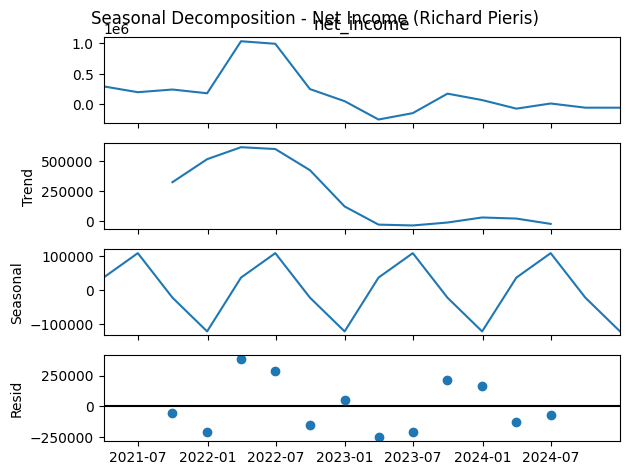

ADF Statistic (Richard Pieris): -2.254563674467217
p-value (Richard Pieris): 0.18704087031720035


In [13]:
# In[8]: Time Series Plots - Richard Pieris
df_rexp.set_index("period_end", inplace=True)
df_rexp.sort_index(inplace=True)

plt.figure(figsize=(12, 6))
for metric in metrics:
    plt.plot(df_rexp.index, df_rexp[metric], marker='o', label=metric)

plt.title("Richard Pieris Exports PLC - Key Metrics Over Time")
plt.xlabel("Period End")
plt.ylabel("Value")
plt.legend()
plt.show()

# Seasonal Decomposition (Example: Net Income)
if len(df_rexp) >= 8:
    result_rich = seasonal_decompose(df_rexp["net_income"], model='additive', period=4)
    result_rich.plot()
    plt.suptitle("Seasonal Decomposition - Net Income (Richard Pieris)")
    plt.show()
else:
    print("Not enough data points to reliably perform seasonal decomposition.")

# Stationarity Check
adf_result_rich = adfuller(df_rexp["net_income"].dropna())
print("ADF Statistic (Richard Pieris):", adf_result_rich[0])
print("p-value (Richard Pieris):", adf_result_rich[1])

df_rexp.reset_index(inplace=True)




## 1. Seasonal Decomposition Observations

You have two seasonal decomposition plots: one for **DIPPED PRODUCTS PLC** (DIPD) and one for **Richard Pieris Exports** (REXP). Each decomposition plot is split into four components:

1. **Observed** (top row, labeled with the original series name, e.g., “Net Income”).  
2. **Trend** (second row).  
3. **Seasonal** (third row).  
4. **Residual** (bottom row).

### DIPPED PRODUCTS PLC (DIPD)
- **Observed (Net Income)**: Shows fluctuations over time. The range is in the millions, indicating DIPD’s net income is generally higher in absolute terms.  
- **Trend**: Appears to be increasing slightly over the observed quarters (though it dips at some points). This suggests overall net income might be trending upward.  
- **Seasonal**: There’s some quarterly pattern. The seasonal line oscillates, suggesting certain quarters are consistently higher or lower than others.  
- **Residual**: The residuals are the leftover variation after removing the trend and seasonality. They don’t appear to show any strong pattern, which is generally a good sign—means the model is capturing the main structure of the data.

### Richard Pieris Exports (REXP)
- **Observed (Net Income)**: Shows fluctuations but on a smaller scale (hundreds of thousands vs. millions).  
- **Trend**: It appears to go up initially, then declines. Overall, the trend line suggests net income is not steadily upward or downward; it changes direction over the period.  
- **Seasonal**: A clear seasonal oscillation is visible, with some quarters systematically higher or lower.  
- **Residual**: The residuals vary around zero, but the amplitude is somewhat larger relative to the net income level.  

**Key Takeaway from Decomposition**: Both companies exhibit some **seasonal** effect each quarter. DIPD’s net income also shows a moderate upward trend, whereas REXP’s net income trend is a bit more variable.

---

## 2. ADF Test Results (Stationarity)

The Augmented Dickey-Fuller test checks whether a time series is **stationary**. For many time series models (like ARIMA), stationarity is a desirable property. Here’s how to interpret the results:

- **DIPD Net Income**  
  - ADF Statistic: **-141.90**  
  - p-value: **0.0**  
  - Because the p-value is essentially 0 (well below 0.05), it strongly suggests DIPD’s net income series is **stationary** in its current form.  
  - This means we can likely fit an ARIMA/SARIMA model to DIPD’s net income without additional differencing or transformations.

- **REXP Net Income**  
  - ADF Statistic: **-2.25**  
  - p-value: **0.187** (i.e., 18.7%)  
  - Since the p-value is greater than 0.05, we fail to reject the null hypothesis of non-stationarity. This implies **REXP’s net income series is not stationary** in its current form.  
  - For ARIMA-like models, you typically need a stationary series, so you’d consider differencing (e.g., 1st difference) or applying a transformation (like a log transform) to help achieve stationarity.

---

## 3. Comparing the Two Companies

1. **Scale of Net Income**  
   - DIPD operates at a higher net income level (millions) compared to REXP (hundreds of thousands). This alone doesn’t dictate how you model them but is useful context.

2. **Trend**  
   - DIPD shows a more consistent upward trend.  
   - REXP has a more variable trend—rising initially, then falling.

3. **Seasonality**  
   - Both exhibit quarterly seasonality, but the amplitude and timing of these seasonal fluctuations differ.

4. **Stationarity**  
   - DIPD’s net income is already stationary (p-value ~ 0.0).  
   - REXP’s net income is not stationary (p-value ~ 0.187). You’ll likely need an extra step (e.g., differencing) to stabilize it.

---

## 4. Next Steps and Recommendations

Given these observations, here’s how you can proceed:

1. **Separate vs. Joint Modeling**  
   - Since each company has distinct patterns and different levels of net income, **modeling them separately** is often simpler and more interpretable.  
   - If you suspect external factors or group-level synergies that drive both companies, you could consider a **multivariate approach** (like a VAR model) that includes both. However, the decomposition suggests each company has its own distinct trend and seasonal behavior, so a separate model for each is usually a good starting point.

2. **Make REXP Stationary**  
   - For **Richard Pieris** net income, you’ll likely need to difference the data or apply a transformation (like log) to make it stationary.  
   - Example approach:
     ```python
     df_richard['net_income_diff'] = df_richard['net_income'].diff()
     ```
     Then re-run the ADF test on `net_income_diff` to see if it’s now stationary.  

3. **Select a Time Series Model**  
   - **DIPD**: Since it appears stationary (and has seasonality), you can try **Seasonal ARIMA (SARIMA)** with a seasonal period of 4 (for quarterly data).  
   - **REXP**: After differencing (or transforming) to achieve stationarity, you can also try a **SARIMA** model.  
   - Alternatively, if you want a simpler approach, you could explore **Exponential Smoothing** (e.g., Holt-Winters) to capture trend and seasonality.

4. **Train/Test Split**  
   - Separate out the most recent quarters as a test set.  
   - Fit your model on the older quarters.  
   - Forecast the test set and compare predictions to actual values to measure accuracy (e.g., RMSE, MAE).

5. **Refine and Compare**  
   - If the initial model doesn’t perform well, consider:
     - Additional differencing if the residuals still show patterns.  
     - Adding or removing seasonal terms.  
     - Using external regressors if there are known factors that drive net income (e.g., macroeconomic data, commodity prices, etc.).

---

## Summary

- **DIPD** has a more stable, upward-trending net income that is already stationary (p-value ~ 0.0), making it straightforward to model with ARIMA/SARIMA.  
- **REXP** has a variable trend, clearer seasonality, and is **not** stationary (p-value ~ 0.187). You’ll need to difference or transform the data before fitting an ARIMA-like model.  
- Both show quarterly seasonality, suggesting **SARIMA** (with a seasonal period of 4) could be a good candidate.  
- Modeling the two companies **separately** is the typical next step unless you have strong reasons to believe a joint (multivariate) model would outperform separate forecasts.  


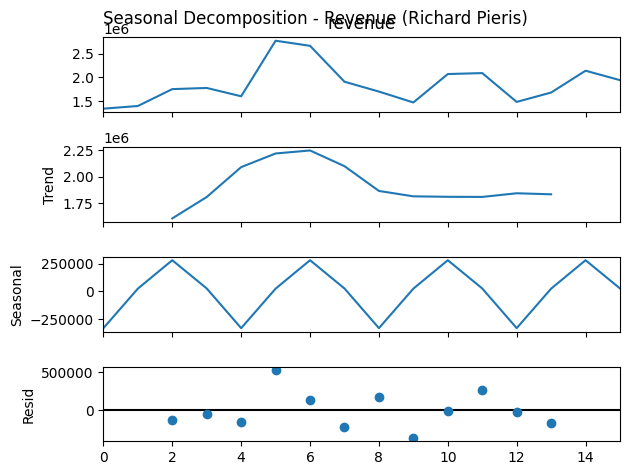

ADF Statistic (Richard Pieris): -14.23331138046292
p-value (Richard Pieris): 1.5828202507131082e-26


In [17]:


# Seasonal Decomposition (Example: Net Income)
if len(df_rexp) >= 8:
    result_rich = seasonal_decompose(df_rexp["revenue"], model='additive', period=4)
    result_rich.plot()
    plt.suptitle("Seasonal Decomposition - Revenue (Richard Pieris)")
    plt.show()
else:
    print("Not enough data points to reliably perform seasonal decomposition.")

# Stationarity Check
adf_result_rich = adfuller(df_rexp["revenue"].dropna())
print("ADF Statistic (Richard Pieris):", adf_result_rich[0])
print("p-value (Richard Pieris):", adf_result_rich[1])

df_rexp.reset_index(inplace=True)


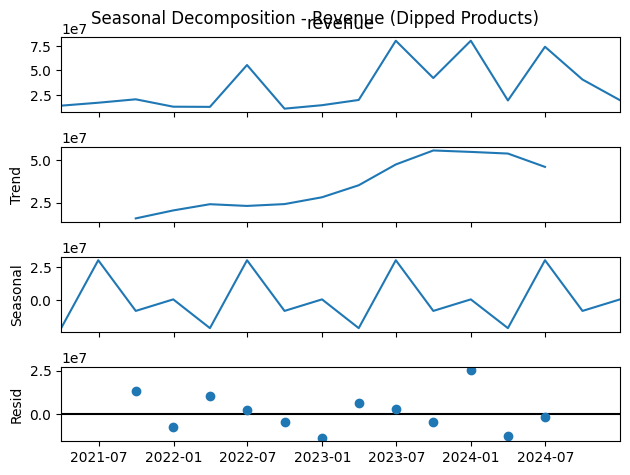

ADF Statistic: -1.9094956460725296
p-value: 0.3276073294668903


In [15]:
# In[6]: Seasonal Decomposition (Example: Net Income)
# With quarterly data, period=4 typically
df_dipd.set_index("period_end", inplace=True)  # set index for decomposition
df_dipd.sort_index(inplace=True)

# Only do decomposition if you have enough data points
if len(df_dipd) >= 8:  # minimal check
    result = seasonal_decompose(df_dipd["revenue"], model='additive', period=4)
    result.plot()
    plt.suptitle("Seasonal Decomposition - Revenue (Dipped Products)")
    plt.show()
else:
    print("Not enough data points to reliably perform seasonal decomposition.")

# Reset index if you want to keep 'period_end' as a column
df_dipd.reset_index(inplace=True)

# In[7]: Stationarity Check (ADF Test on Net Income)
df_dipd.set_index("period_end", inplace=True)
adf_result = adfuller(df_dipd["revenue"].dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Similarly, you could test other metrics
df_dipd.reset_index(inplace=True)



Below is an interpretation of the **seasonal decomposition** and **ADF test** results for **Revenue** in both companies, along with suggestions for how to proceed. We’ll compare these observations to your Net Income findings and provide actionable next steps.

---

## 1. Seasonal Decomposition Insights

### 1.1. Richard Pieris Exports (REXP)

1. **Observed (Revenue)**  
   - The decomposition chart shows revenue ranging roughly from 1.6M to 2.5M (based on the scale of the first plot).  
   - There are some noticeable fluctuations from quarter to quarter.

2. **Trend**  
   - The trend component initially rises and then falls, indicating revenue peaks in the middle of the observed period before tapering off slightly.

3. **Seasonal**  
   - There is a repeating seasonal pattern each quarter (the third panel). Some quarters consistently appear higher than others.  
   - The amplitude of this seasonal effect is in the **hundreds of thousands** range.

4. **Residual**  
   - The residual points (fourth panel) do not show an obvious pattern, meaning most of the systematic behavior is captured by the trend + seasonal components.

### 1.2. Dipped Products PLC (DIPD)

1. **Observed (Revenue)**  
   - Revenue is on a larger scale, varying roughly from 2.5M up to around 7.5M or more (based on the first panel).

2. **Trend**  
   - The trend appears to increase fairly steadily until around mid-2023, then dips slightly. Overall, a positive slope is evident.

3. **Seasonal**  
   - Like REXP, there is a clear seasonal pattern (quarterly ups and downs), though the amplitude is somewhat smaller relative to the total revenue scale.  
   - You can see a repeating wave in the seasonal panel (third row).

4. **Residual**  
   - The residual is in the range of **millions**, but mostly clusters around zero without a consistent pattern. This is generally a good sign that the main trends and seasonality have been captured.

---

## 2. ADF Test Results (Stationarity)

The **Augmented Dickey-Fuller (ADF)** test helps determine if a time series is stationary (i.e., no overall trend or seasonality in the raw data).

1. **REXP (Richard Pieris) Revenue**  
   - **ADF Statistic**: -14.2333  
   - **p-value**: 1.58e-26 (way below 0.05)  
   - Interpretation: A very low p-value means we reject the null hypothesis of non-stationarity. Thus, **REXP’s revenue series is already stationary** in its current form.

2. **DIPD (Dipped Products) Revenue**  
   - **ADF Statistic**: -1.9095  
   - **p-value**: 0.3276  
   - Interpretation: Because the p-value is greater than 0.05, we cannot reject the null hypothesis; **DIPD’s revenue is not stationary**. This aligns with the visible upward trend in the decomposition.

---

## 3. Comparing Revenue and Net Income Findings

- For **Net Income**, we saw that DIPD was stationary, while REXP was not.  
- For **Revenue**, the situation is **reversed**: REXP is stationary, while DIPD is not.  

This highlights that each **metric** (Net Income vs. Revenue) can behave differently within the same company. One metric might have a clear upward trend (thus non-stationary), while another might fluctuate around a stable mean (stationary).

---

## 4. Recommendations and Next Steps

Given these observations, here’s how you might proceed:

1. **Separate Modeling per Metric and per Company**  
   - Because each metric (Revenue, Net Income, etc.) behaves differently, you typically build **individual forecasting models**.  
   - For example, if you want to forecast DIPD’s Revenue, that’s one model. If you also want to forecast DIPD’s Net Income, that’s another model.  
   - Similarly, do the same for REXP.  

2. **Address Non-Stationary Series**  
   - **DIPD Revenue** is non-stationary. You likely need to **difference** the data or apply a transformation (e.g., log transform) to achieve stationarity for ARIMA/SARIMA.  
     ```python
     # Example of first differencing:
     df_dipd['revenue_diff'] = df_dipd['revenue'].diff()
     # Then re-check stationarity on 'revenue_diff'
     ```  
   - **REXP Revenue** is already stationary; no differencing required for a basic ARIMA approach (though you still might use a seasonal differencing if the seasonal pattern is strong).

3. **Seasonal Considerations**  
   - Both show quarterly seasonality. If you’re using ARIMA-type models, a **Seasonal ARIMA (SARIMA)** with `m=4` (for quarterly data) is appropriate.  
   - For DIPD’s revenue, you might try `(p,d,q)` + `(P,D,Q,4)` where `D` might be 1 if seasonal differencing is needed.

4. **Evaluate Models**  
   - Perform a **train/test split** on your time series (e.g., train on the first 8–10 quarters, test on the remaining quarters).  
   - Fit your chosen model (e.g., SARIMA, Exponential Smoothing, or even a machine learning approach) and compare the forecasts to the actual values in the test set.  
   - Use metrics like **MAE** (Mean Absolute Error), **RMSE**, or **MAPE** to measure forecast accuracy.

5. **Decide on Separate vs. Joint Modeling**  
   - Generally, each company and metric is modeled separately, especially if they have unique dynamics.  
   - If you suspect strong relationships (e.g., DIPD’s revenue strongly influences REXP’s revenue), you could explore **multivariate models** (like VAR). However, the typical approach is to start with separate models and only consider combined modeling if there is a compelling reason (e.g., high cross-correlation).

6. **Document & Iterate**  
   - Keep track of how you transform each series (differencing, logs, etc.).  
   - Try multiple configurations of SARIMA or other models and compare performance.  
   - Update your data and retrain the models periodically to maintain accuracy.

---

## 5. Summary of Key Points

- **Richard Pieris (REXP) Revenue**: Stationary in its current form (p-value \(\ll\) 0.05). You can likely apply a seasonal ARIMA model directly (with or without additional differencing for the seasonal component).  
- **Dipped Products (DIPD) Revenue**: Not stationary (p-value ~ 0.33). You need to difference or transform this data before using ARIMA/SARIMA.  
- **Both Have Seasonal Patterns**: A **seasonal** model (SARIMA) with `m=4` is recommended.  
- **Next Steps**:  
  1. **Differentiate** between the series that are already stationary and those that need differencing.  
  2. **Split** your data into train/test sets.  
  3. **Fit & Evaluate** your chosen models (ARIMA, SARIMA, etc.).  
  4. **Compare** results and refine.

Following these steps will guide you toward building robust forecasting models for each company’s revenue and net income. As you continue, you’ll refine your approach based on actual forecast performance.